# **Spotify and Youtube EDA**

Notebook a Spotify and Youtube EDA-hoz (forrás az adathoz: https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube)

In [4]:
#imports
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## **1. Szöveges bemutatása az adatszerkezetnek és a jellemzőknek**
EDA során első lépés, hogy szövegesen ismertetjük az adathalmazt, kontextust adunk a tartalmának, egyes jellemzőknek, értékeknek.

Az adathalmaz összegyűjtött jellemzői:

* Track: a dal neve, ahogyan a Spotify platformon látható.

* Artist: az előadó neve.

* Url_spotify: az előadó URL-je.

* Album: az album, amelyben a dal megtalálható a Spotify-on.

* Album_type: jelzi, hogy a dal a Spotify-on single-ként jelent meg, vagy egy album részeként.

* Uri: egy Spotify-link, amely a dalt az API-n keresztül lehet keresni.

* Danceability: leírja, mennyire alkalmas egy szám táncoláshoz a zenei elemek kombinációja alapján, beleértve a tempót, ritmusstabilitást, az ütem erősségét és az általános szabályosságot. A 0.0 érték a legkevésbé táncolható, az 1.0 pedig a leginkább táncolható.

* Energy: egy 0.0 és 1.0 közötti érték, amely az intenzitás és aktivitás érzetét mutatja. Az energikus számok általában gyorsnak, hangosnak és zajosnak érződnek. Például a death metal magas energiájú, míg egy Bach prelúdium alacsony értéket kap. A tulajdonságot befolyásoló tényezők: dinamikai tartomány, észlelt hangosság, hangszín, bekövetkezési sebesség és általános entrópia.

* Key: a dal hangneme. Az egész számok a standard Pitch Class jelöléssel vannak összerendelve. Pl. 0 = C, 1 = C♯/D♭, 2 = D stb. Ha nem sikerült hangnemet detektálni, az érték –1.

* Loudness: a dal teljes hangereje decibelben (dB). A hangossági értékek a teljes dalra vannak átlagolva, és a számok relatív hangerejének összehasonlítására használhatók. A hangosság a hang olyan tulajdonsága, amely pszichológiai értelemben az amplitúdó erősségével függ össze. Az értékek tipikusan –60 és 0 dB között vannak.

* Speechiness: kimutatja a beszélt szavak jelenlétét egy dalban. Minél inkább beszédszerű a felvétel (például talk show, hangoskönyv, vers), annál közelebb kerül az érték az 1.0-hoz. A 0.66 feletti értékek valószínűleg teljesen beszélt tartalmú számokat jelölnek. A 0.33 és 0.66 közötti értékek olyan számokat írnak le, amelyekben zene és beszéd is jelen van, akár külön szakaszokban, akár rétegezve, például rap esetén. A 0.33 alatti értékek valószínűleg zenei és nem beszélt tartalmú számokat jelölnek.

* Acousticness: egy 0.0 és 1.0 közötti megbízhatósági érték arra, hogy a dal akusztikus-e. Az 1.0 magas biztonságot jelent arra, hogy a dal akusztikus.

* Instrumentalness: megjósolja, hogy egy szám tartalmaz-e éneket. Az „Ooh” és „Aah” hangok ebben a kontextusban instrumentálisnak számítanak. A rap vagy beszélt tartalmú számok egyértelműen „vokálisak”. Minél közelebb van az érték az 1.0-hoz, annál nagyobb a valószínűsége annak, hogy a szám nem tartalmaz éneket. A 0.5 feletti értékek instrumentális számokat jelölnek, de a biztonság magasabb, ahogy az érték közelít az 1.0-hoz.

* Liveness: kimutatja a közönség jelenlétét a felvételen. A magasabb értékek nagyobb valószínűséget jelentenek arra, hogy a szám élőben lett előadva. A 0.8 feletti érték erős valószínűséget jelent arra, hogy a szám élő.

* Valence: egy 0.0 és 1.0 közötti érték, amely azt írja le, mennyire pozitív hangulatot közvetít a szám. A magas valence-értékű számok pozitívabbnak hangzanak (például vidám, derűs, eufórikus), míg az alacsony értékűek negatívabbnak (például szomorú, depressziós, dühös).

* Tempo: a szám becsült tempója ütem per percben (BPM). A tempó a zenei darab sebességére utal, és közvetlenül az átlagos ütemhosszból származik.

* Duration_ms: a szám hossza milliszekundumban.

* Stream: a dal Spotify-lejátszásainak száma.

* Url_youtube: a dalhoz kapcsolódó YouTube-videó URL-je, ha van ilyen.

* Title: a videó címe a YouTube-on.

* Channel: a csatorna neve, amely feltöltötte a videót.

* Views: a megtekintések száma.

* Likes: a kedvelések száma.

* Comments: a hozzászólások száma.

* Description: a videó leírása a YouTube-on.

* Licensed: jelzi, hogy a videó licencelt tartalom-e, ami azt jelenti, hogy a tartalmat egy YouTube-tartalompartnerhez kötött csatorna töltötte fel, és a partner igényt tart rá.

* official_video: logikai érték, amely azt jelzi, hogy a talált videó a dal hivatalos videóklipje-e./


Összefüggések, kérdések:
1. Van kimutatható összefüggés a jellemzők és a hallgatottság/nézettség között.
2. A dalcímek alapján azonosíthatóak tematikus csoportok (pl. szerelmes,
szomorú), melyek a népszerűséget is befolyásolják.
3. Az egyedi vagy szokatlan című dalok várhatóan kevésbé népszerűek, mint a
tipikus címek.

## **2. Adatszerkezet beolvasása és megismerése**

In [27]:
#adathalmaz beolvasása
path=os.path.join(os.path.dirname(os.getcwd()), 'Data', 'Spotify_Youtube.csv')

df = pd.read_csv(path, index_col=0) 
df.head()


,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [28]:
# adathalmaz mérete
df.shape

(20718, 27)

In [29]:
# oszlopok
df.columns

Index(['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [30]:
# oszlopok típusa (szöveg, objektum, szám)
df.dtypes

Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

***Duplikátumok vizsgálata***

In [31]:
# mennyi duplikátum van az adathalmazban
df[df.duplicated()]

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream


In [32]:
duplicate_rows_df = df[df.duplicated()]
print("Duplikált sorok száma: ", duplicate_rows_df.shape[0])

Duplikált sorok száma:  0


***Mezők megszámolása***

In [33]:
df.count()

Artist              20718
Url_spotify         20718
Track               20718
Album               20718
Album_type          20718
Uri                 20718
Danceability        20716
Energy              20716
Key                 20716
Loudness            20716
Speechiness         20716
Acousticness        20716
Instrumentalness    20716
Liveness            20716
Valence             20716
Tempo               20716
Duration_ms         20716
Url_youtube         20248
Title               20248
Channel             20248
Views               20248
Likes               20177
Comments            20149
Description         19842
Licensed            20248
official_video      20248
Stream              20142
dtype: int64

In [34]:
#checking for missing values
df.isnull().sum()

Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [35]:
# üres mezők aránya (százalékosan)
df.isnull().sum() / df.shape[0] * 100

Artist              0.000000
Url_spotify         0.000000
Track               0.000000
Album               0.000000
Album_type          0.000000
Uri                 0.000000
Danceability        0.009653
Energy              0.009653
Key                 0.009653
Loudness            0.009653
Speechiness         0.009653
Acousticness        0.009653
Instrumentalness    0.009653
Liveness            0.009653
Valence             0.009653
Tempo               0.009653
Duration_ms         0.009653
Url_youtube         2.268559
Title               2.268559
Channel             2.268559
Views               2.268559
Likes               2.611256
Comments            2.746404
Description         4.228207
Licensed            2.268559
official_video      2.268559
Stream              2.780191
dtype: float64

## **3. Jellemzők vizsgálata és ábrázolása**

### **3.1. Numerikus adatok áttekintő vizsgálata**

In [36]:
# numerikus jellemzők főbb statiszikái
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


*pandas.describe* függvény automatikusan csak a szám típusú jellemzőket írja ki

Ezeket is értelmezni kell, például hol van értelme ezeknek a jellemzőknek

További észrevételek:  

In [37]:
# módusz
df.select_dtypes(exclude="object").mode()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,0.687,0.572,0.0,-7.818,0.0324,0.114,0.0,0.11,0.961,77.986,237467.0,6.639000e+03,0.0,0.0,169769959.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.191200e+04,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.333960e+05,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.020790e+06,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.877674e+06,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.266725e+06,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.309968e+07,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.588325e+07,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.623863e+07,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.870131e+07,NaN,NaN,NaN


In [6]:
#statistical summary1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

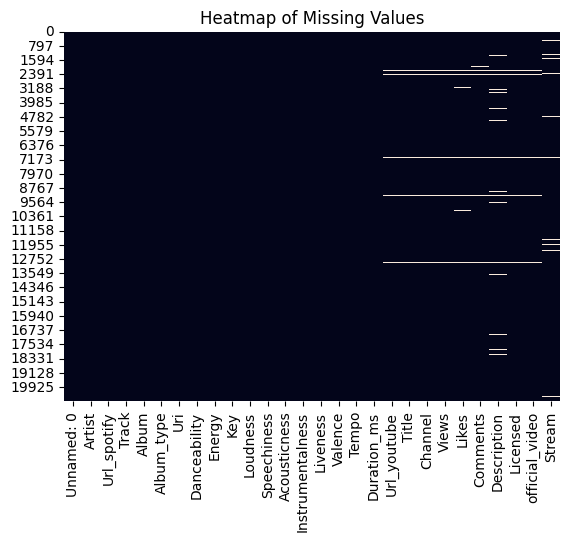

In [9]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Heatmap of Missing Values")
plt.show()


Text(0.5, 1.0, 'Views Distribution (Log Transformed)')

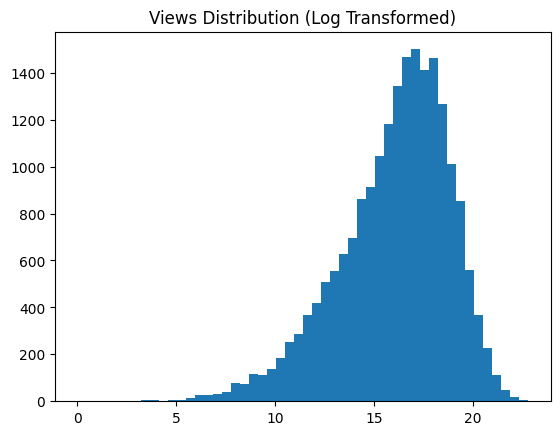

In [10]:
df['Views_log'] = np.log1p(df['Views'])

plt.hist(df['Views_log'], bins=50)
plt.title("Views Distribution (Log Transformed)")


Text(0.5, 1.0, 'Correlation Matrix')

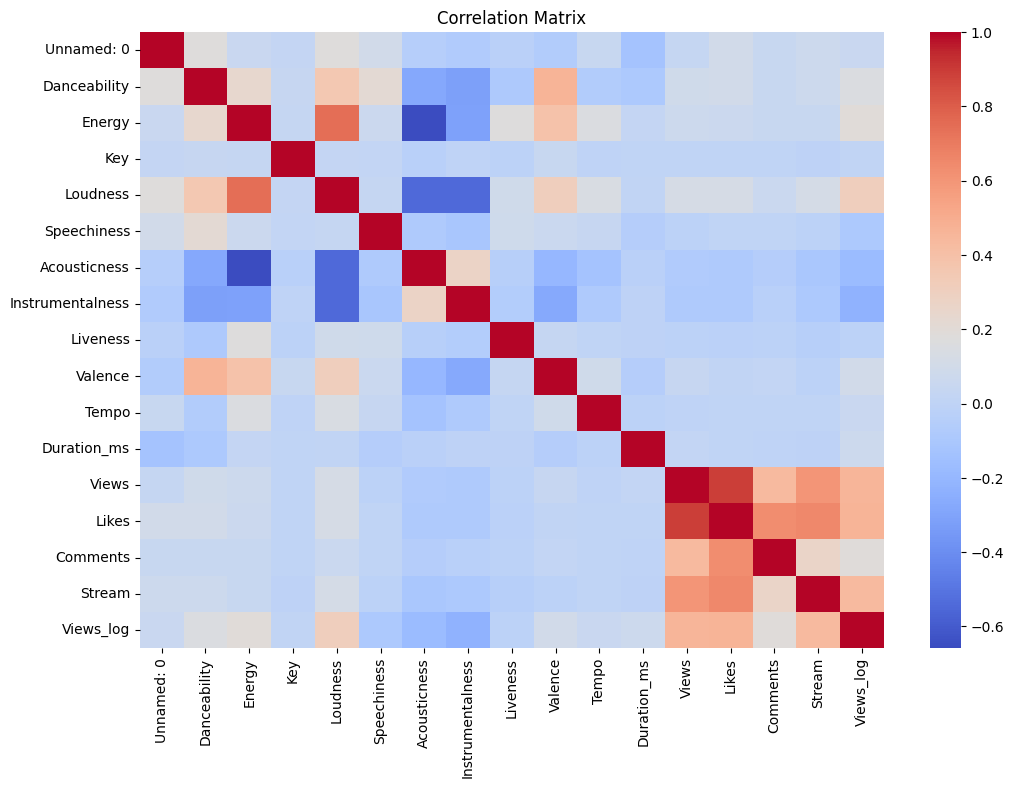

In [11]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")


In [12]:
df.groupby("Key")["Views"].mean().sort_values()


Key
9.0     8.097725e+07
7.0     8.209483e+07
3.0     8.414420e+07
2.0     8.634419e+07
4.0     8.701593e+07
0.0     9.240659e+07
1.0     9.899586e+07
5.0     9.966362e+07
8.0     1.009286e+08
10.0    1.035528e+08
6.0     1.060884e+08
11.0    1.093062e+08
Name: Views, dtype: float64

Text(0.5, 1.0, 'Key vs Views (log)')

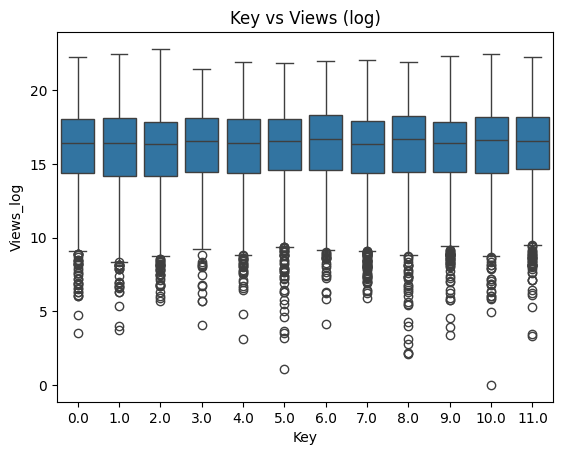

In [13]:
sns.boxplot(data=df, x="Key", y="Views_log")
plt.title("Key vs Views (log)")


<Axes: xlabel='title_length', ylabel='Views_log'>

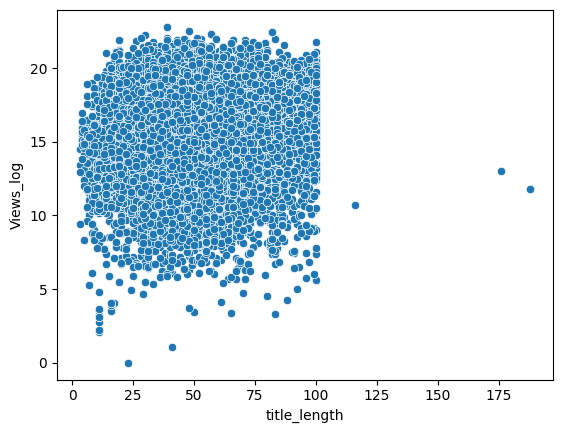

In [14]:
df['title_length'] = df['Title'].str.len()
sns.scatterplot(data=df, x="title_length", y="Views_log")


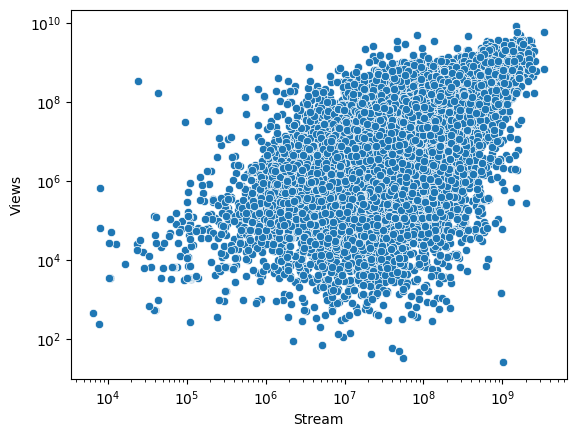

In [15]:
sns.scatterplot(data=df, x="Stream", y="Views")
plt.xscale("log")
plt.yscale("log")


<Axes: ylabel='Views_log'>

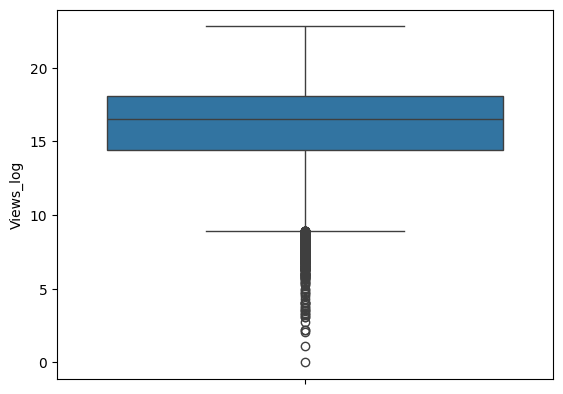

In [16]:
sns.boxplot(df["Views_log"])
